<a href="https://colab.research.google.com/github/ilinthm26/Luminar/blob/EDA/customerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Customer Churn Analysis & Retention Strategy.***

-----------------------------------------------------------------------

# Business understanding
🎯 Business Objective

Reduce customer churn

Identify high-risk segments

Provide retention strategy recommendations

📌 Key Questions

Which customers are most likely to churn?

What service attributes influence churn?

Does pricing impact churn probability?

How does contract type affect retention?

📌 Executive Summary

Overall churn rate: XX%

Highest churn observed in Month-to-Month customers

Customers with tenure < 12 months show highest churn probability

Higher monthly charges moderately increase churn risk

Geography has negligible impact on churn

💡 Business Recommendation

Incentivize long-term contracts

Strengthen onboarding in first 90 days

Provide value reinforcement for high-paying customers

# Importing libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the excel file and view.

In [ ]:
df=pd.read_excel(r'/content/Telco_customer_churn.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


# Data Understating and Data cleaning
Rows: 7,043 customers

Columns: 33 features

Each row represents a unique customer (CustomerID = 7043 unique values).

No duplicate records.

Target variable: Churn Label (Yes / No)

The dataset contains:

  Demographics (Gender, Senior Citizen, Partner, Dependents)

  Services (Internet, Streaming, Tech Support, etc.)

  Financials (Monthly Charges, Total Charges, CLTV)

  Customer lifecycle (Tenure Months)

  Behavioral outcome (Churn)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
df.shape

(7043, 33)

In [ ]:
df.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip Code,int64
Lat Long,object
Latitude,float64
Longitude,float64
Gender,object


In [ ]:
df.isna().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['CustomerID'].nunique()
#the count matches the data shape as the datset is based on customer data.

7043

# Exploratory Data Analysis

### Summary Statistics.





In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### Distribution check




Distribution of Customer Tenure




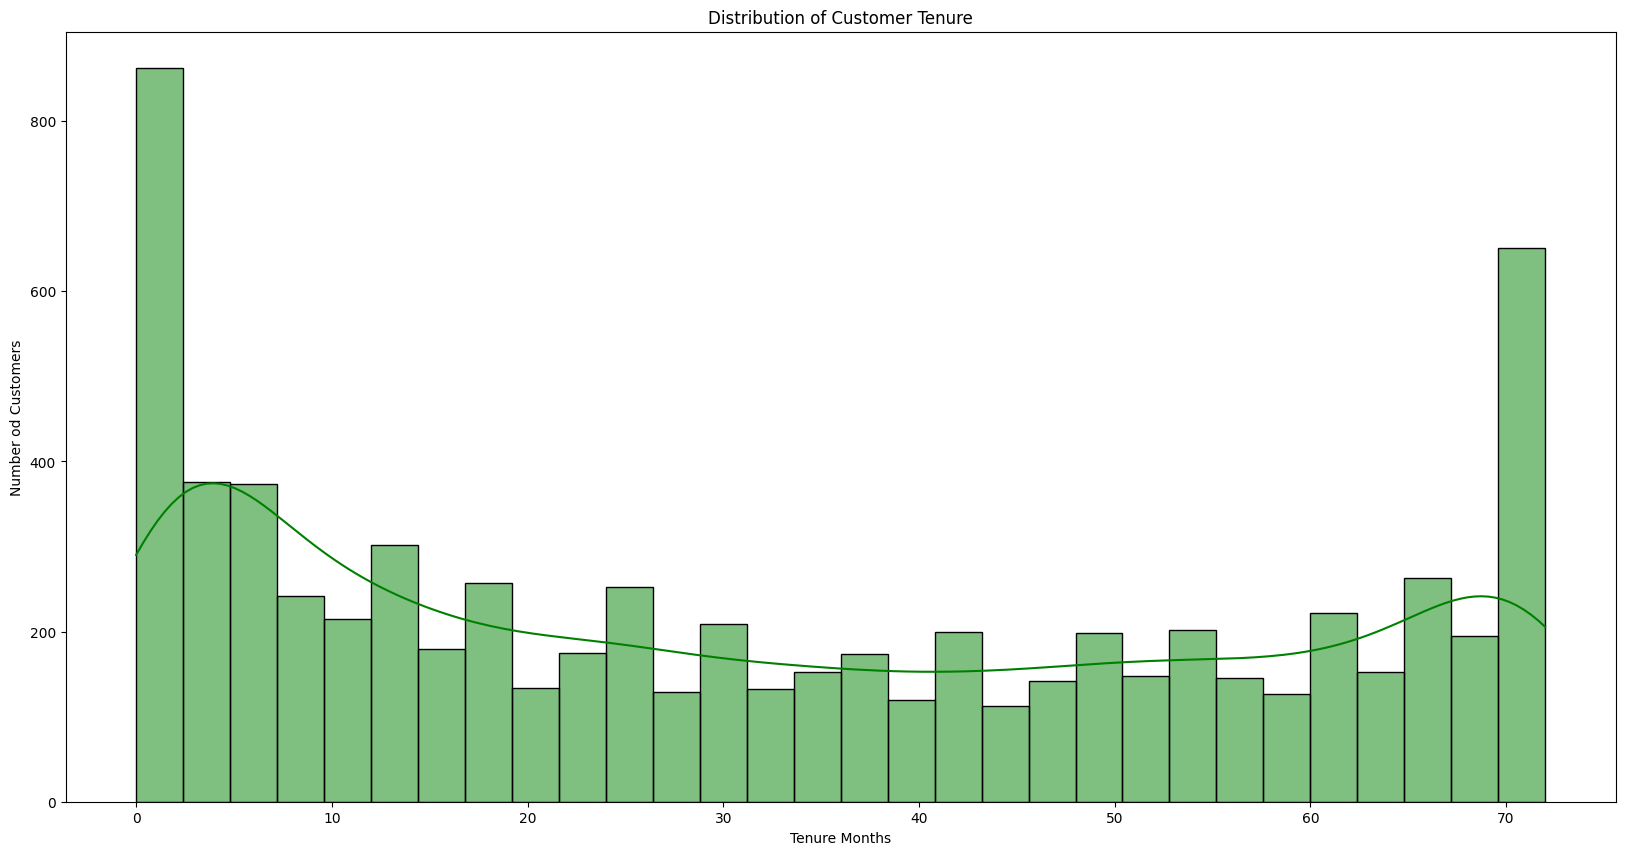

In [ ]:

plt.figure(figsize=(20,10))
plt.title("Distribution of Customer Tenure")
sns.histplot(df['Tenure Months'],bins=30, kde=True,color='green')
plt.xlabel("Tenure Months")
plt.ylabel("Number od Customers")
plt.show()

A large portion of customers are relatively new, which may increase chrun risk if onboarding is weak. The graph shows large cluster in low tenure, drop-off after early months and smaller cluster of some loyal customers.

Plot Distribution of Monthly Charges

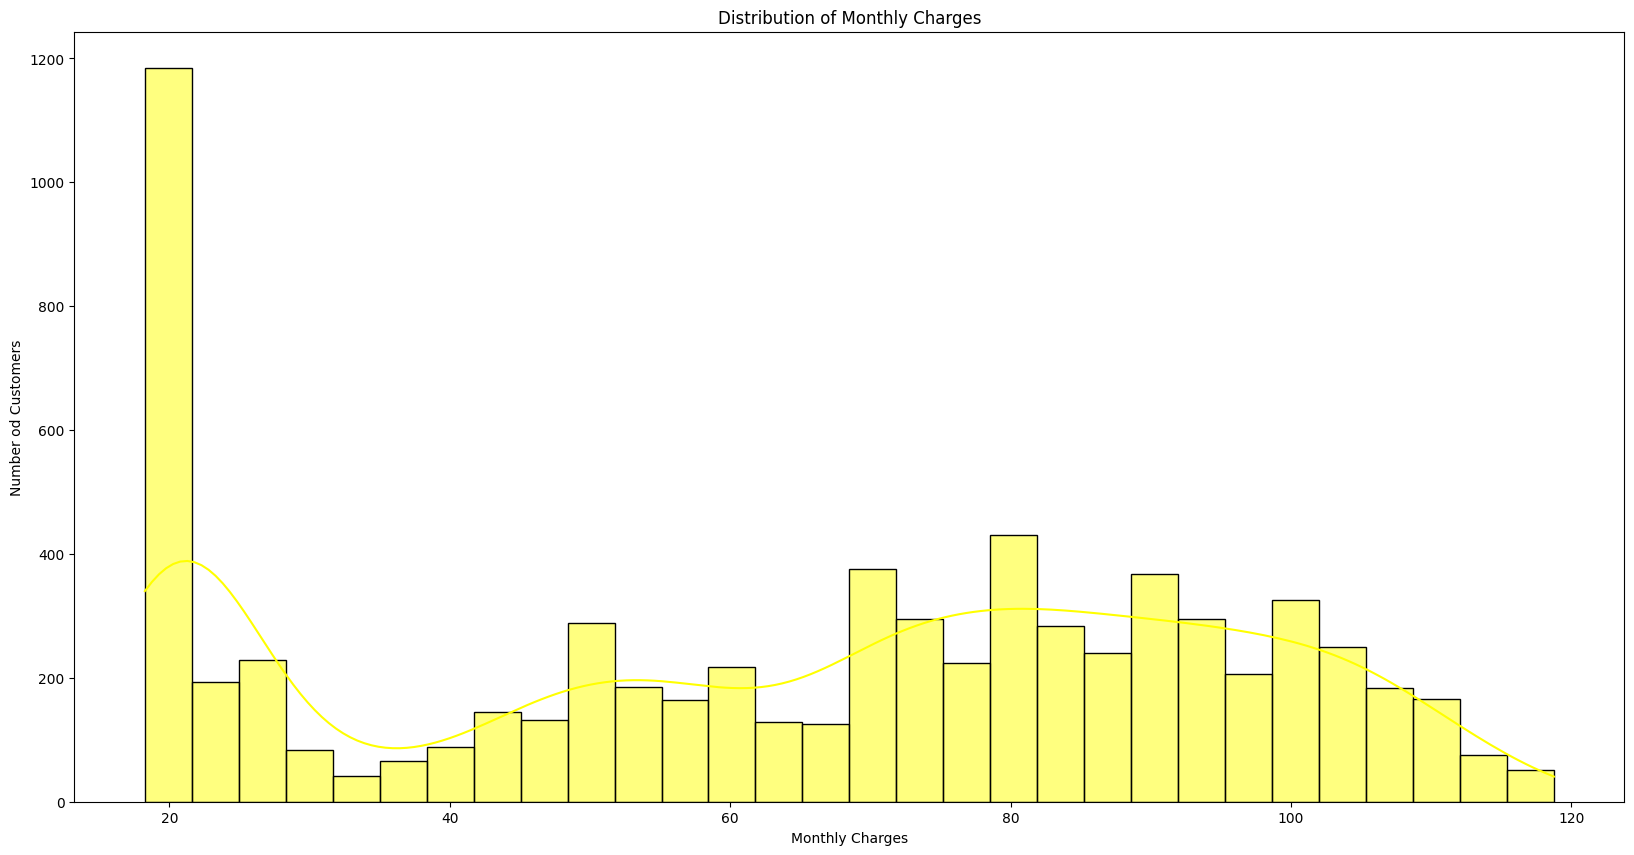

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Distribution of Monthly Charges")
sns.histplot(df['Monthly Charges'],bins=30, kde=True,color='yellow')
plt.xlabel("Monthly Charges")
plt.ylabel("Number od Customers")
plt.show()

The data is distributed over 15-118 rupees per month. The distribution is of monthly charges is bimodal, that is two dominant customer segments. A low-cost basic plan and a mid/high-segment plan. This suggests a tired pricing model.

Monthly charges Distribution by churn.

In [ ]:
# plt.figure(figsize=(20,10))
# plt.title('Monthly charges Distribution by churn')
# sns.histplot(data=df,x='Monthly Charges',hue='Churn Label', bins=30, kde=True)

# Higher-paying customers appear to exhibit relatively higher churn probability, indicating a potential value perception gap or service dissatisfaction among premium subscribers.
# Possiblr Reasons:

# High expectations unmet

# Poor service quality relative to price

# Competitive alternatives offering better value

Total Charges Distribution

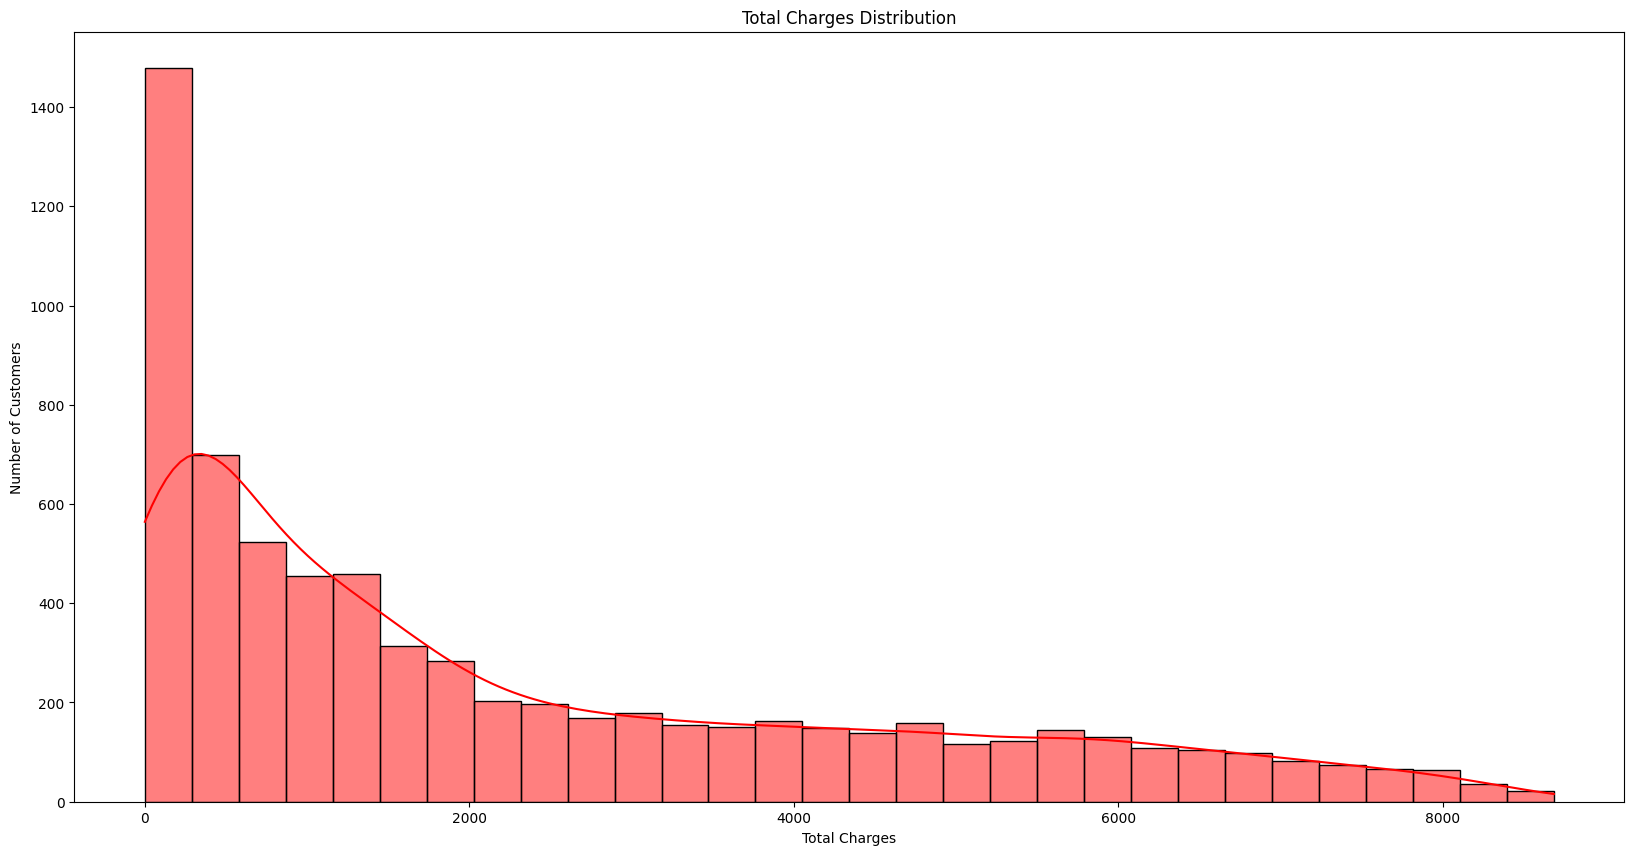

In [ ]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].fillna(0)


plt.figure(figsize=(20,10))
sns.histplot(data=df,x='Total Charges',bins=30, kde=True,color='red')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()

The graph shows that many cutomers have low total charges which suggests high churn rate among new customers. This distribution is skewd, with a peak at lower charges, which is common for services where customers start with lower cost and accumaulate over time.

### Categorical Understanding

Unique value in each columns:

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
  print("-----",col,"-----")
  print(col,df[col].unique())
  print()

----- CustomerID -----
CustomerID ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']

----- Country -----
Country ['United States']

----- State -----
State ['California']

----- City -----
City ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']

----- Lat Long -----
Lat Long ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']

----- Gender -----
Gender ['Male' 'Female']

----- Senior Citizen -----
Senior Citizen ['No' 'Yes']

----- Partner -----
Partner ['No' 'Yes']

----- Dependents -----
Dependents ['No' 'Yes']

----- Phone Service -----
Phone Service ['Yes' 'No']

----- Multiple Lines -----
Multiple Lines ['No' 'Yes' 'No phone service']

----- Internet Service -----
Internet Service ['DSL' 'Fiber optic' 'No']

----- Online Security -----
Online Security ['Yes' 'No' 'No internet service']

----- Online B

Value distribution:

Contract : Month to Month

Internet Service: Fiber Optics

Payment Method: Electronic Method

In [ ]:
df['Contract'].value_counts(normalize=True)*100


,proportion
Contract,
Month-to-month,55.019168
Two year,24.066449
One year,20.914383


In [ ]:
df['Payment Method'].value_counts(normalize=True)*100

,proportion
Payment Method,
Electronic check,33.579441
Mailed check,22.887974
Bank transfer (automatic),21.922476
Credit card (automatic),21.610109


In [ ]:
df['Internet Service'].value_counts(normalize=True)*100


,proportion
Internet Service,
Fiber optic,43.958540
DSL,34.374556
No,21.666903


# Key Insights


### Churn Rate KPIs:

 The churn rate is 26% which indicated that approximately 1 in 4 customers discontinues services, representing significant revenue risk.

In [47]:
total_customers=df.shape[0]
churned =df[df['Churn Label']=='Yes'].shape[0]
churn_rate=churned/total_customers*100

print("Total Customers:",total_customers)
print('Churned Customers:',churned)
print('Churn Rate: {:.2f}%'.format(churn_rate))

Total Customers: 7043
Churned Customers: 1869
Churn Rate: 26.54%


In [ ]:
df['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


In [ ]:
df['Churn Label'].value_counts(normalize=True)*100

,proportion
Churn Label,
No,73.463013
Yes,26.536987


<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn Label', ylabel='count'>

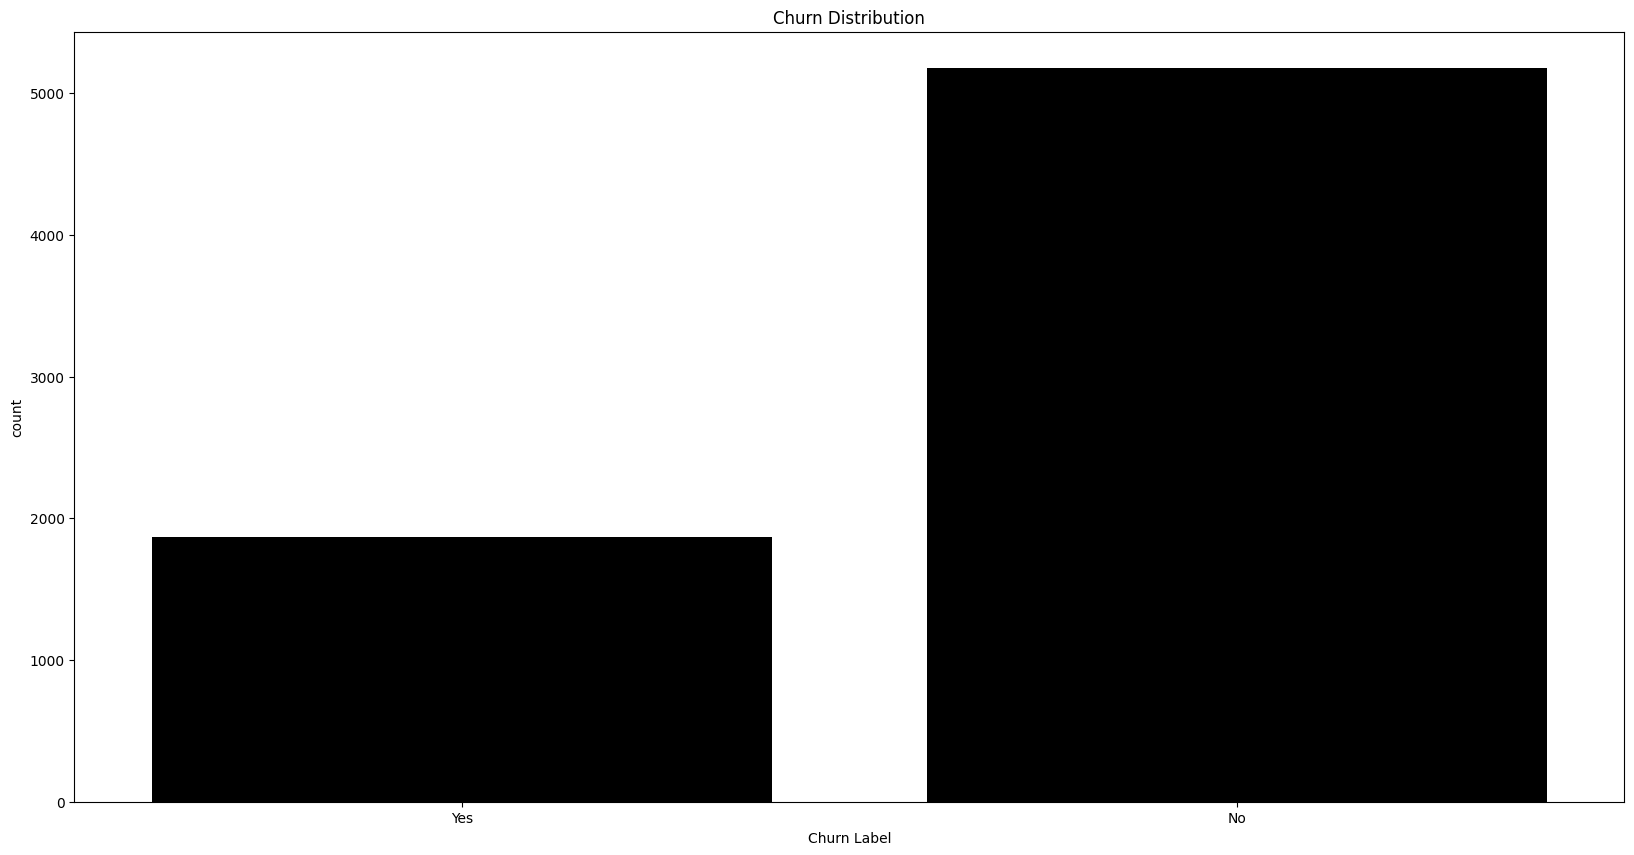

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Churn Distribution")
sns.countplot(data=df,x='Churn Label',color='black')

### Distribution of Churn Rate By Categorical Values.

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
print('categorical_columns: ', categorical_columns)
print('numeric_columns:',numeric_columns )


categorical_columns:  ['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason']
numeric_columns: ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']


In [56]:
categorical_cols =[
    'Contract',
    'Internet Service',
    'Payment Method',
    'Tech Support',
    'Streaming Movies'
]

The customers who takes month-to-month contract, fiber optics as internet service and pays using electronic checks are higher risk to churn.

In [57]:
for col in categorical_cols:
  print('---------',col,'---------')
  print(pd.crosstab(df[col],df['Churn Label'],normalize=True)*100)
  print()

--------- Contract ---------
Churn Label            No        Yes
Contract                            
Month-to-month  31.520659  23.498509
One year        18.557433   2.356950
Two year        23.384921   0.681528

--------- Internet Service ---------
Churn Label              No        Yes
Internet Service                      
DSL               27.857447   6.517109
Fiber optic       25.543092  18.415448
No                20.062473   1.604430

--------- Payment Method ---------
Churn Label                       No        Yes
Payment Method                                 
Bank transfer (automatic)  18.259265   3.663212
Credit card (automatic)    18.316058   3.294051
Electronic check           18.372852  15.206588
Mailed check               18.514837   4.373136

--------- Tech Support ---------
Churn Label                 No        Yes
Tech Support                             
No                   28.780349  20.531024
No internet service  20.062473   1.604430
Yes                  24.620

Visual Representation of the above crosstabs:

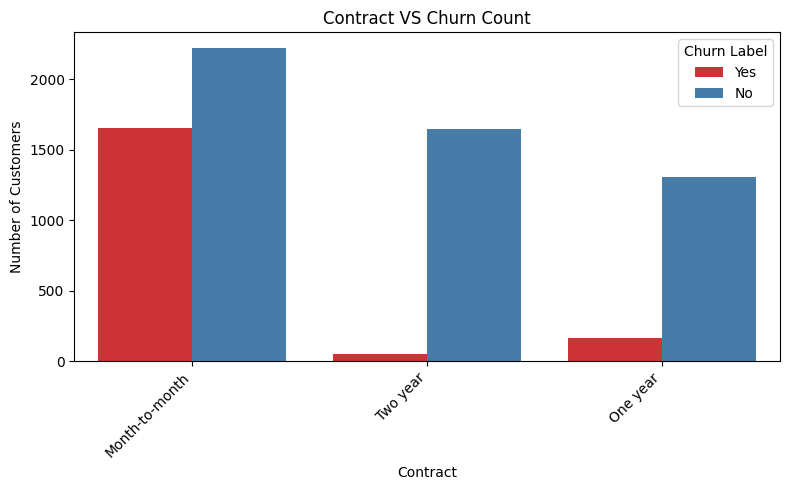

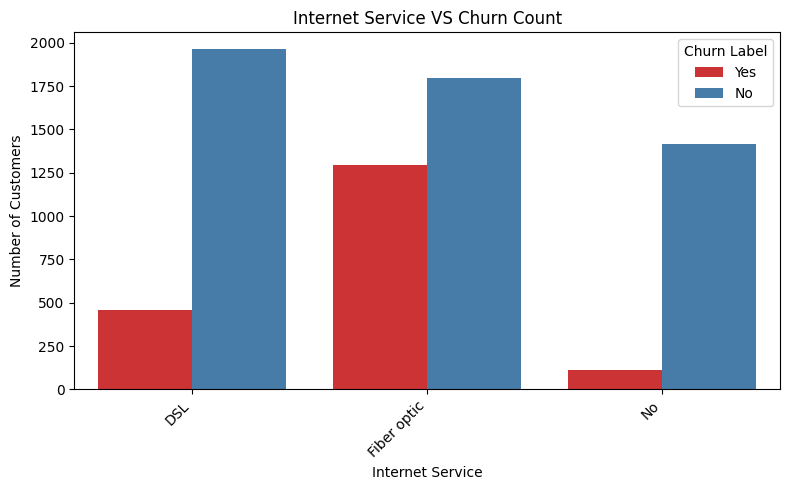

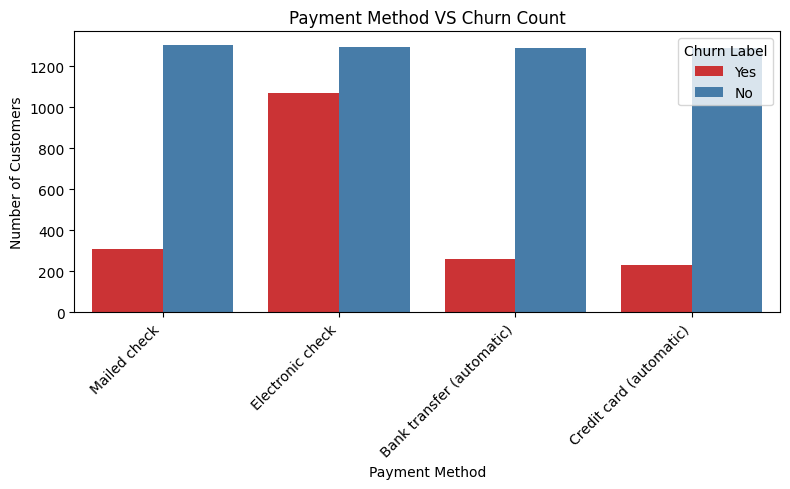

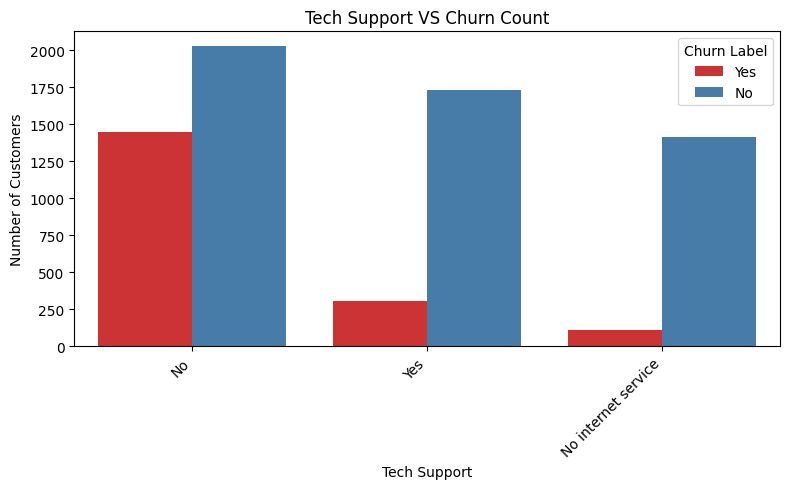

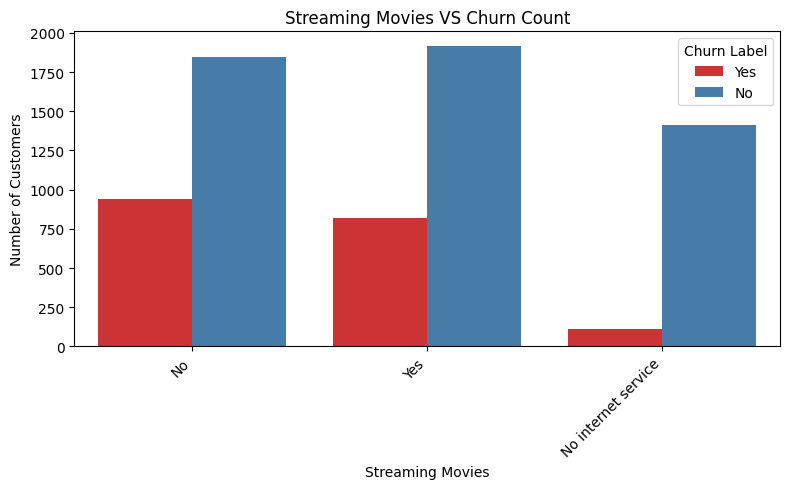

In [58]:
for col in categorical_cols:
  print()
  plt.figure(figsize=(8,5)) # Adjusted figure size for better readability
  sns.countplot(data=df,
              x=col,
              hue='Churn Label',
              palette='Set1')
  plt.title(f'{col} VS Churn Count') # Changed title to reflect count
  plt.xlabel(col)
  plt.ylabel('Number of Customers') # Clearer y-axis label
  plt.xticks(rotation=45, ha='right') # Rotate and align x-axis labels
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show()



### Distribution of Churn Rate By Numerical Values.

Tenure exhibits the storngest negative with churn (-0.35), indicating newly acquired customers are significantly more likely to discontinue service. Monthly Charges show a positive correaltion (0.19), suggestinf that higher-priced plans may expereince slightly hiegher churn risk. Geographic variable demonstrate negligible impact, implying that churn is primarly influenced by service tenure and pricing rather than location.

Text(0.5, 1.0, 'Correlation with Churn')

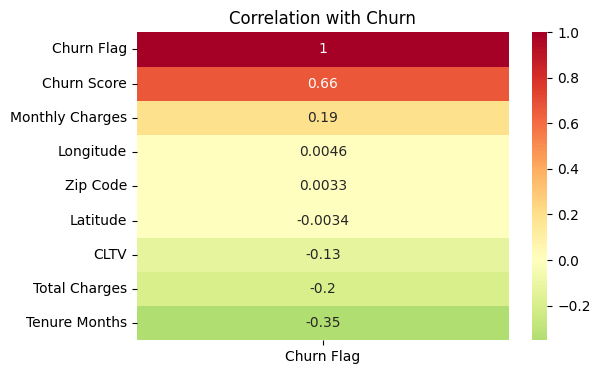

In [55]:

df['Churn Flag']=df['Churn Label'].map({'Yes':1,'No':0})
df_corr = df.drop(columns=['Churn Value', 'Count'])
corr=df_corr.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(
    corr[['Churn Flag']].sort_values(by='Churn Flag', ascending=False),
    annot=True,
    cmap='RdYlGn_r',
    center=0
)
plt.title('Correlation with Churn')

### Current Revenue at Risk:

In [65]:
monthly_revenue=df['Monthly Charges'].sum()
churned_revenue=df[df['Churn Label']=='Yes']['Monthly Charges'].sum()

print("Total Monthly Revenue:",monthly_revenue)
print("Churned Revenue:",churned_revenue)
print("Revenue at Risk %:",round(churned_revenue/monthly_revenue*100,2))

Total Monthly Revenue: 456116.6
Churned Revenue: 139130.85
Revenue at Risk %: 30.5


In [70]:
mtm_total_revenue=df[df['Contract']=='Month-to-month']['Monthly Charges'].sum()
mtm_churned_revenue=df[(df['Contract']=='Month-to-month') & (df['Churn Label']=='Yes')]['Monthly Charges'].sum()
print("Total Monthly Revenue:",mtm_total_revenue)
print("Churned Revenue:",mtm_churned_revenue)


Total Monthly Revenue: 257294.15
Churned Revenue: 120847.1


In [75]:
new_total_revenue=df[df['Tenure Months']<12]['Monthly Charges'].sum()
new_churned_revenue=df[(df['Tenure Months']<12) & (df['Churn Label']=='Yes')]['Monthly Charges'].sum()
print("Total Monthly Revenue:",round(new_total_revenue,2))
print("Churned Revenue:",round(new_churned_revenue,2))


Total Monthly Revenue: 115979.9
Churned Revenue: 66022.3


# Revenue Impact Simulation


### 10% Churn Reduction (Month-to-month contracts)

If we reduce churn in month to month contracts by 10%, it would result in approximately 12K rupees monthly revenue, and 1.4L a year. Given the high churn concentration in this segment, targeted contract conversion incetives could generate significant impact.

In [72]:
retention_score=0.10
revenue_saved = mtm_churned_revenue*retention_score
print("Revenue Saved Monthly:",round(revenue_saved,2))
print("Revenue Saved Yeraly:",round(revenue_saved*12),2)

Revenue Saved Monthly: 12084.71
Revenue Saved Yeraly: 145017 2


### 10% Churn Reduction (New Customers)

In [76]:
retention_score=0.10
revenue_saved = new_churned_revenue*retention_score
print("Revenue Saved Monthly:",round(revenue_saved,2))
print("Revenue Saved Yeraly:",round(revenue_saved*12),2)

Revenue Saved Monthly: 6602.23
Revenue Saved Yeraly: 79227 2


# Conclusion & Future Scope

📌 Conclusion
Overall churn rate is 26%.

Month-to-month customers are the primary churn drivers.

Customers with tenure <12 months have highest risk.

High monthly charges impacts churn moderately.

A 10% churn targeted retention strategy can recover 1.4L annually.


🚀 Future Scope

Build predictive churn model

Deploy dashboard in Power BI/ Tableau

Run A/B test retention campaigns

